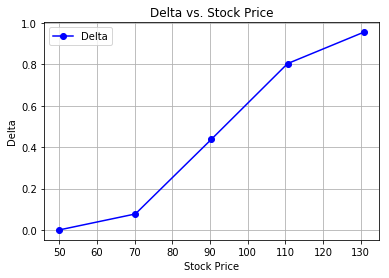

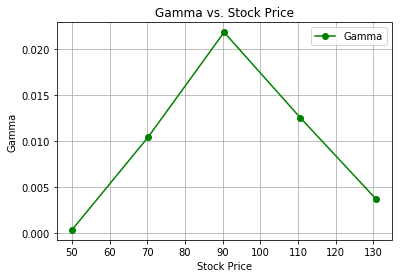

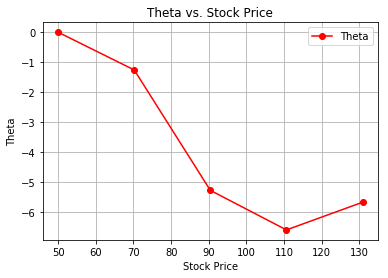

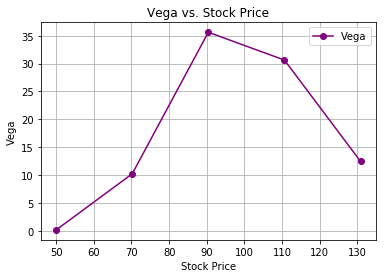

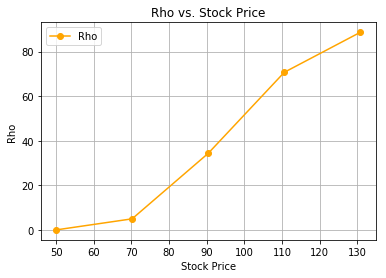

In [26]:



import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import os

# Define option parameters
S = np.array([50.00, 70.20, 90.40, 110.61, 130.81])  # Stock prices
K = 100               # Strike price
T = 1                 # Time to maturity (in years)
r = 0.05              # Risk-free interest rate
sigma = 0.2           # Volatility (20% annual)
option_type = 'call'  # Option type: 'call' or 'put'

# Black-Scholes formula for European option pricing and Greeks
def black_scholes(S, K, T, r, sigma, option_type='call'):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    if option_type == 'call':
        price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
        delta = norm.cdf(d1)
        rho = K * T * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == 'put':
        price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
        delta = -norm.cdf(-d1)
        rho = -K * T * np.exp(-r * T) * norm.cdf(-d2)
    else:
        raise ValueError("Invalid option type. Choose 'call' or 'put'.")

    gamma = norm.pdf(d1) / (S * sigma * np.sqrt(T))
    theta = (-S * norm.pdf(d1) * sigma) / (2 * np.sqrt(T)) - r * K * np.exp(-r * T) * norm.cdf(d2)
    vega = S * norm.pdf(d1) * np.sqrt(T)

    return price, delta, gamma, theta, vega, rho

# Store Greeks
deltas, gammas, thetas, vegas, rhos = [], [], [], [], []

# Compute for each stock price
for stock_price in S:
    _, delta, gamma, theta, vega, rho = black_scholes(stock_price, K, T, r, sigma, option_type)
    deltas.append(delta)
    gammas.append(gamma)
    thetas.append(theta)
    vegas.append(vega)
    rhos.append(rho)

# Path to save images
desktop_path = r'C:\Users\LENOVO\Desktop'

# Plotting function
def plot_and_save(x, y, title, ylabel, filename, color):
    plt.figure(figsize=(6, 4))
    plt.plot(x, y, label=ylabel, color=color, marker='o')
    plt.title(title)
    plt.xlabel('Stock Price')
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.legend(loc='best')
    save_path = os.path.join(desktop_path, filename)
    plt.savefig(save_path)
    plt.show()
    plt.close()

# Plot all Greeks
plot_and_save(S, deltas, 'Delta vs. Stock Price', 'Delta', 'Delta1.png', 'blue')
plot_and_save(S, gammas, 'Gamma vs. Stock Price', 'Gamma', 'Gamma1.png', 'green')
plot_and_save(S, thetas, 'Theta vs. Stock Price', 'Theta', 'Theta1.png', 'red')
plot_and_save(S, vegas, 'Vega vs. Stock Price', 'Vega', 'Vega1.png', 'purple')
plot_and_save(S, rhos, 'Rho vs. Stock Price', 'Rho', 'Rho1.png', 'orange')





